# 4. Redes Neurais Lineares para Classificação

Mesmo quando avançamos em direção à classificação, a maior parte do encanamento permanece o mesmo: 
1. carregar os dados,
2. passá-los pelo modelo,
3. gerar resultados,
4. calcular a perda,
5. calcular gradientes em relação aos pesos e
6. atualizar o modelo.

No entanto, a forma precisa dos alvos, a parametrização da camada de saída e a escolha da função de perda serão adaptadas para se adequarem à configuração de classificação .

# 4.1. Regressão Softmax

Função softmax

__Softmax é comumente usado na camada de saída de uma rede neural para tarefas de classificação.__

Uma função de ativação conveniente que transforma os resultados de uma camada de rede neural comum em distribuições de probabilidade discretas válidas. 

A __função softmax__, também conhecida como __softargmax__ ou __função exponencial normalizada__, converte um vetor de K números reais em uma distribuição de probabilidade de K resultados possíveis. É uma generalização da função logística para várias dimensões e é usada na regressão logística multinomial. A função softmax é frequentemente usada como a última função de ativação de uma rede neural para normalizar a saída de uma rede para uma distribuição de probabilidade sobre as classes de saída previstas, com base no axioma de escolha de Luce.

Antes de aplicar a softmax, alguns componentes do vetor podem ser negativos ou maiores que um e podem não somar 1, mas, após aplicar a softmax, cada componente estará no intervalo (0,1), e os componentes serão somados a 1, de modo que possam ser interpretados como probabilidades. Além disso, os componentes de entrada maiores corresponderão a probabilidades maiores.

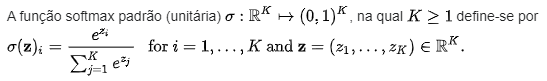

O termo "softmax" deriva dos efeitos de amplificação do exponencial em qualquer máximo no vetor de entrada. Por exemplo, o softmax padrão de 
(1,2,8) é aproximadamente (0.001,0.002,0.997), o que equivale a atribuir quase todo o peso unitário total no resultado à posição do elemento máximo do vetor (de 8).

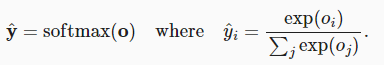



__Arg max suave__

O nome "softmax" é enganoso. A função não é um máximo suave (ou seja, uma aproximação suave da função máxima), mas uma aproximação suave da função arg max: a função cujo valor é o "índice" do maior elemento de um vetor. De fato, o termo "softmax" também é usado para a função LogSumExp, que é um máximo suave. Por esse motivo, alguns preferem o termo mais preciso "softargmax", mas o termo "softmax" é convencional no aprendizado de máquina.

In [7]:
import numpy as np

o = [1.0, 2.0, 8.0]                           # pode usar valor inteiro também.
softmax_o = np.exp(o) / np.sum(np.exp(o))
sum_sftmx_o = np.sum(softmax_o)

print(softmax_o)                              # vetor b normalizado através de função exponencial (softmax)
print(sum_sftmx_o)

[9.08800555e-04 2.47037604e-03 9.96620823e-01]
1.0


# 4.1.1.3. Vetorização

Para melhorar a eficiência computacional, vetorizamos cálculos em minilotes de dados.



# 4.1.2. Função de perda

Perda de entropia cruzada:

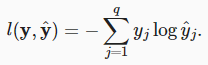

y_hat é dado pelo softmax.

# 4.1.2.2. Softmax e perda de entropia cruzada

A derivada da perda de entropia cruzada quando combinada com softmax se comporta de forma muito semelhante à derivada do erro quadrático; nomeadamente tomando a diferença entre o comportamento esperado e a sua previsão.
 
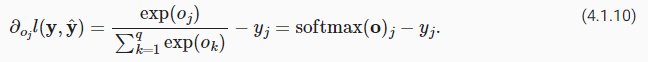

Em outras palavras, a derivada é a diferença entre a probabilidade atribuída pelo nosso modelo, conforme expressa pela operação softmax, e o que realmente aconteceu, conforme expresso pelos elementos do vetor one-hot label. Nesse sentido é muito parecido com o que vimos na regressão, onde o gradiente era a diferença entre a observação y e estimar y_hat.

Agora consideremos o caso em que observamos não apenas um único resultado, mas toda uma distribuição de resultados. Podemos usar a mesma representação de antes para o rótulo y. A única diferença é que, em vez de um vetor contendo apenas entradas binárias, digamos (0, 0, 1), agora temos um vetor de probabilidade genérico, digamos (0.1, 0.2, 0.7). 
. 


Essa perda é chamada de perda de entropia cruzada e é uma das perdas mais comumente utilizadas para problemas de classificação. 
Em poucas palavras, mede o número de bits necessários para codificar o que vemos (y) em relação ao que prevemos que deveria acontecer (y_hat).



# 4.1.3.1. Entropia

A ideia central da teoria da informação é quantificar a quantidade de informação contida nos dados. Isso limita nossa capacidade de compactar dados.

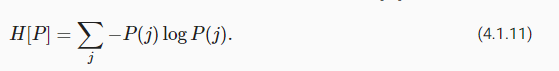

Resumindo, podemos pensar no objetivo de classificação de entropia cruzada de duas maneiras: (i) como maximizar a probabilidade dos dados observados; e (ii) minimizando nossa surpresa (e, portanto, o número de bits) necessários para comunicar os rótulos.

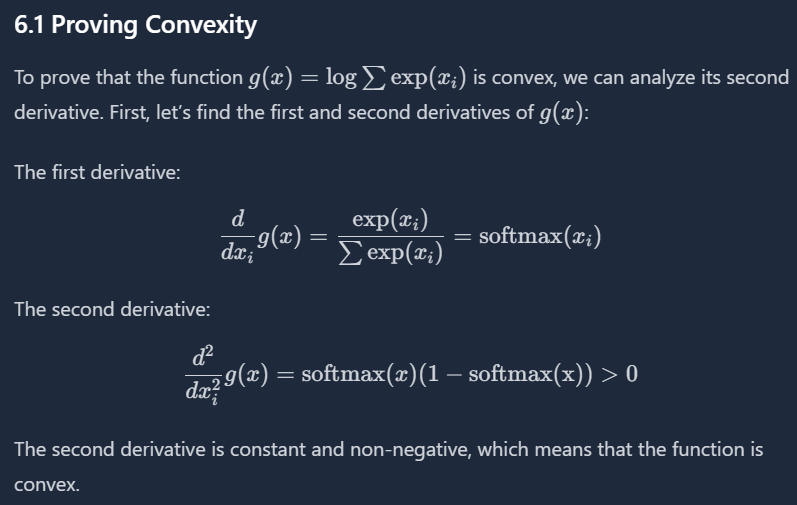